### Importamos las librerias necesarias para el analisis exploratorio

In [1]:
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import mitosheet
import pydotplus
from six import StringIO
from IPython.display import Image
from pydotplus import graph_from_dot_data

### Importamos el dataset

In [3]:
df = pd.read_csv('Breast_Cancer.csv')

### Empezamos el AE explorando y entendiendo el dataset original

In [4]:
df.keys()

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [5]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [6]:
df.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [9]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


### Usamos librerias como profiling para hacer un analisis exploratorio antes de realizar cambios en el data set para seguir entendiendolo mejor

In [10]:
prof = ProfileReport(df) 
prof.to_file('Breast_Cancer_Original.html')

### Realizamos los analisis de correlacion entre las variables y el target diagnosis

In [11]:
df[['mean_radius', 'diagnosis']].groupby(['mean_radius'], as_index=False).mean().sort_values(by='diagnosis', ascending=False)

,mean_radius,diagnosis
0,6.981,1.0
189,12.960,1.0
173,12.750,1.0
174,12.760,1.0
176,12.780,1.0
...,...,...
340,16.600,0.0
341,16.650,0.0
342,16.690,0.0
343,16.740,0.0


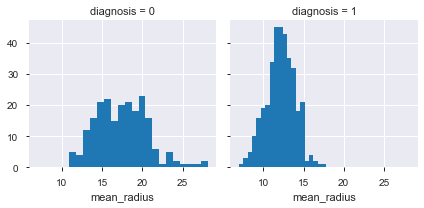

In [12]:
grid = sn.FacetGrid(df, col='diagnosis')
grid.map(plt.hist, 'mean_radius', bins=20)

In [13]:
df[['mean_texture', 'diagnosis']].groupby(['mean_texture'], as_index=False).mean().sort_values(by='diagnosis', ascending=False)

,mean_texture,diagnosis
0,9.71,1.0
235,18.84,1.0
209,18.29,1.0
208,18.24,1.0
207,18.22,1.0
...,...,...
323,21.24,0.0
327,21.31,0.0
328,21.35,0.0
330,21.38,0.0


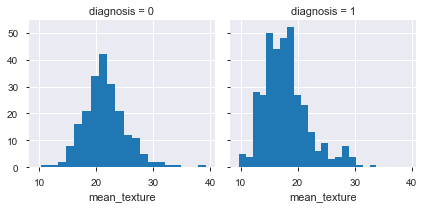

In [14]:
grid = sn.FacetGrid(df, col='diagnosis')
grid.map(plt.hist, 'mean_texture', bins=20)

In [15]:
df[['mean_perimeter', 'diagnosis']].groupby(['mean_perimeter'], as_index=False).mean().sort_values(by='diagnosis', ascending=False)

,mean_perimeter,diagnosis
0,43.79,1.0
228,82.71,1.0
236,83.51,1.0
235,83.19,1.0
234,83.18,1.0
...,...,...
395,103.80,0.0
396,104.10,0.0
399,105.10,0.0
400,105.70,0.0


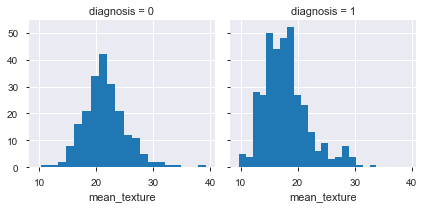

In [16]:
grid = sn.FacetGrid(df, col='diagnosis')
grid.map(plt.hist, 'mean_texture', bins=20)

In [17]:
df[['mean_area', 'diagnosis']].groupby(['mean_area'], as_index=False).mean().sort_values(by='diagnosis', ascending=False)

,mean_area,diagnosis
0,143.5,1.0
231,508.8,1.0
239,515.9,1.0
238,514.5,1.0
237,514.3,1.0
...,...,...
404,797.8,0.0
405,798.8,0.0
407,803.1,0.0
408,805.1,0.0


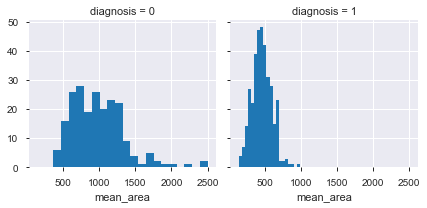

In [18]:
grid = sn.FacetGrid(df, col='diagnosis')
grid.map(plt.hist, 'mean_area', bins=20)

In [20]:
df[['mean_smoothness', 'diagnosis']].groupby(['mean_smoothness'], as_index=False).mean().sort_values(by='diagnosis', ascending=False)

,mean_smoothness,diagnosis
0,0.05263,1.0
228,0.09309,1.0
1,0.06251,1.0
235,0.09379,1.0
234,0.09373,1.0
...,...,...
239,0.09401,0.0
238,0.09387,0.0
98,0.08355,0.0
236,0.09383,0.0


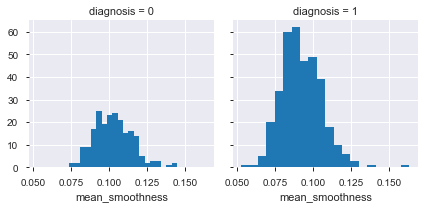

In [19]:
grid = sn.FacetGrid(df, col='diagnosis')
grid.map(plt.hist, 'mean_smoothness', bins=20)

### Al ver que todo esta completo y sin aparentes problemas de datos exportamos el resultado, que en este caso seria el mismo que de entrada

In [22]:
df.to_csv('Breast_Cancer_Out.csv', index=False)